In [1]:
import os
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import torch
from lsh import LSH

In [2]:
df_train = pd.read_csv("../dataset/pointcloud_mnist_2d/train.csv")
df_test = pd.read_csv("../dataset/pointcloud_mnist_2d/test.csv")

X = df_train[df_train.columns[1:]].to_numpy()
y = df_train[df_train.columns[0]].to_numpy()

X = X.reshape(X.shape[0], -1, 3)

X.shape, y.shape

((60000, 351, 3), (60000,))

In [3]:
mean_pooling_train = []
for i in range(X.shape[0]):
    sample = X[i, :, :]
    sample = sample[sample[:, 2] > 0][:, :2]
    mean_pooling_train.append(np.mean(sample, axis=0, keepdims=True))

In [4]:
mean_pooling_train[0].shape

(1, 2)

In [5]:
mean_pooling_train = np.concatenate(mean_pooling_train, axis=0)

In [6]:
mean_pooling_train.shape

(60000, 2)

In [7]:
model = LSH(2, 2, 1)

In [8]:
model.train(torch.from_numpy(mean_pooling_train).to(dtype=torch.float), torch.from_numpy(y))

In [9]:
X_test = df_test[df_test.columns[1:]].to_numpy()
y_test = df_test[df_test.columns[0]].to_numpy()

X_test = X_test.reshape(X_test.shape[0], -1, 3)

X_test.shape, y_test.shape

((10000, 351, 3), (10000,))

In [11]:
num_samples = 1000
preds = []
test_sample_pooled_lst = []
for i in range(X_test.shape[0]):
    if i % 100 == 0:
        print(i)
    if i == num_samples:
        break
    test_sample = X_test[i, :, :]
    test_sample = test_sample[test_sample[:, 2] > 0][:, :2]
    test_sample_pooled = np.mean(test_sample, axis=0, keepdims=True)
    test_sample_pooled_lst.append(test_sample_pooled)
    preds.append(model.predict(torch.from_numpy(test_sample_pooled.T).to(torch.float)).item())

0
100
200
300
400
500
600
700
800
900
1000


In [12]:
print(accuracy_score(y_test[:num_samples], preds))

0.097


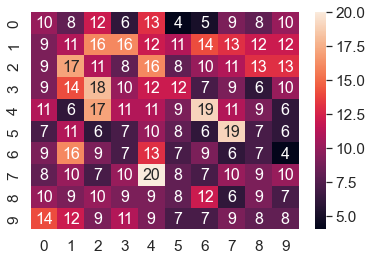

In [13]:
cm = confusion_matrix(y_test[:num_samples], preds)

df_cm = pd.DataFrame(cm, range(10), range(10))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [14]:
test_sample_pooled = np.concatenate(test_sample_pooled_lst, axis=0)

In [15]:
test_sample_pooled.shape

(1000, 2)

In [16]:
Counter(y_test[:num_samples])

Counter({7: 99,
         2: 116,
         1: 126,
         0: 85,
         4: 110,
         9: 94,
         5: 87,
         6: 87,
         3: 107,
         8: 89})

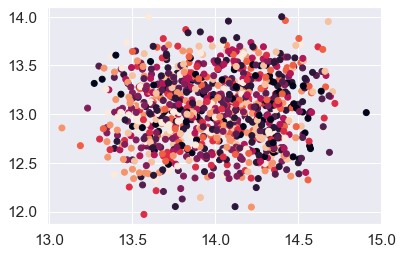

In [17]:
plt.scatter(test_sample_pooled[:, 0], test_sample_pooled[:, 1], c=y_test[:num_samples])
plt.show()